**Libraries**

https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/

In [ ]:
#import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.under_sampling import NearMiss
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import label_binarize


**Read Dataset**

In [ ]:
#Load dataset
diabetes_df = pd.read_csv("/content/sample_data/diabetes_012_health_indicators_BRFSS2015.csv")
print(diabetes_df.shape)
print(diabetes_df.head())

(253680, 22)
   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        

In [ ]:
# Check target class count
diabetes_df['Diabetes_012'].value_counts()

,count
Diabetes_012,
0.0,213703
2.0,35346
1.0,4631


In [ ]:
#check dataset info
display(diabetes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

None

In [ ]:
data_description = diabetes_df.describe()
data_description

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


1. The dataset has 253,680 observations with no missing data in any of the 22 columns.

2. The mean BMI is 28.38, with a standard deviation of 6.61, indicating variation in weight across individuals.

3. About 29.7% of the population falls under the category of diabetes or prediabetes (target variable "Diabetes_012").

4. Around 42.9% of the individuals have high blood pressure, and 42.4% have high cholesterol.

5. Most individuals have had their cholesterol checked (96.3%).

6. No missing values were found in the dataset, indicating that the data is complete, and no further imputation or handling of missing values is required.

In [ ]:
#check for missing value
missing_data = diabetes_df.isnull().sum()
missing_data

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


# **Exploratory Data Analysis**

array([[<Axes: title={'center': 'Diabetes_012'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'c

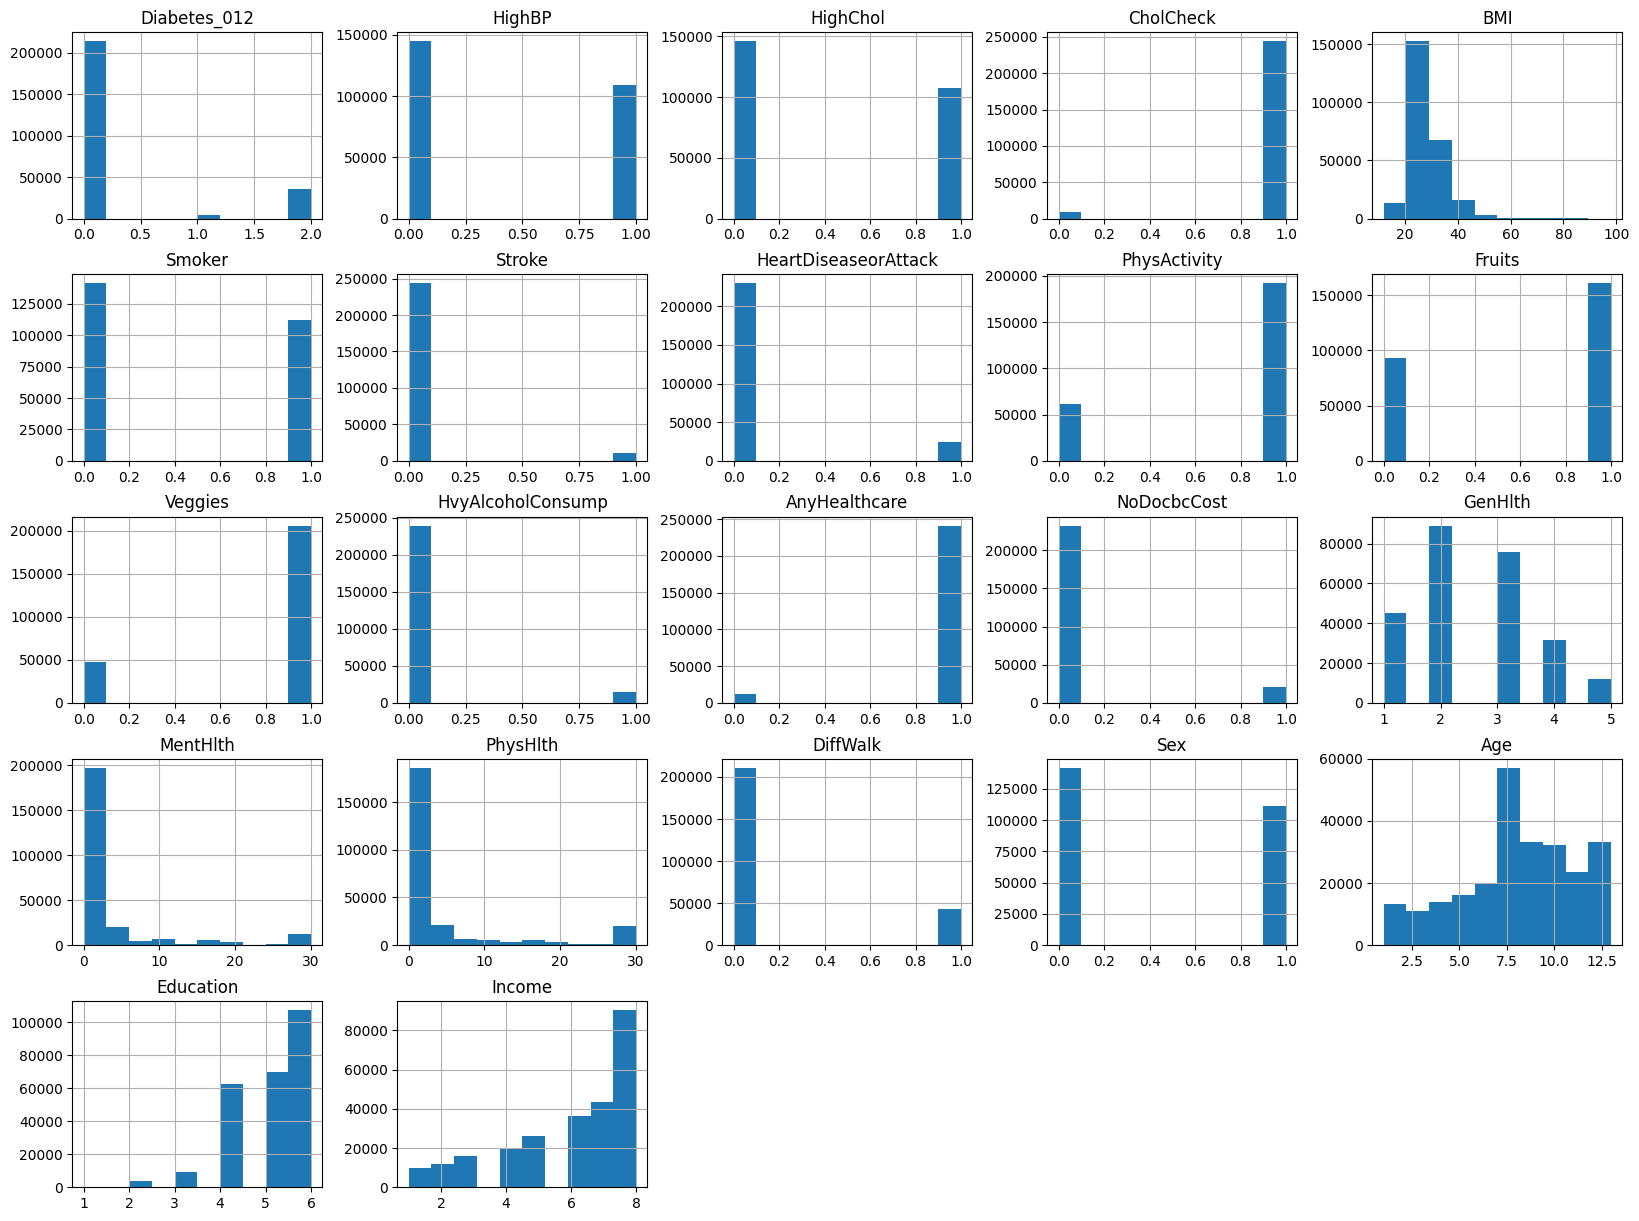

In [ ]:
#check feature distribution using histogram
diabetes_df.hist(figsize = (20,15))

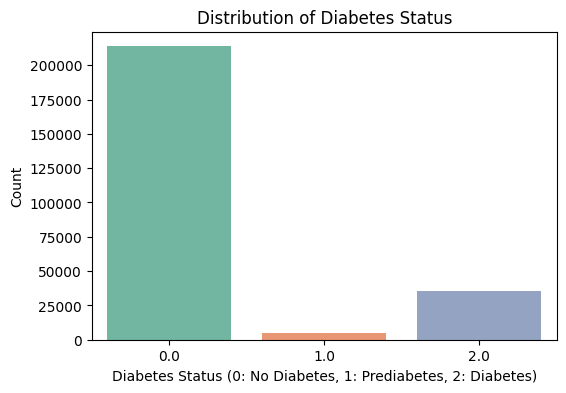

In [ ]:
#Distribution of target variable (Diabetes_012)

plt.figure(figsize=(6, 4))
sns.countplot(x='Diabetes_012', data=diabetes_df, palette='Set2',  hue='Diabetes_012', legend=False)
plt.title("Distribution of Diabetes Status")
plt.xlabel("Diabetes Status (0: No Diabetes, 1: Prediabetes, 2: Diabetes)")
plt.ylabel("Count")
plt.show()


In [ ]:
# check which features are more related to the target variable (Diabetes_012),
correlation_matrix = diabetes_df.corr()

#correlation of each feature with the target variable 'Diabetes_012'
correlation_with_target = correlation_matrix["Diabetes_012"].sort_values(ascending=False)
correlation_with_target

,Diabetes_012
Diabetes_012,1.000000
GenHlth,0.302587
HighBP,0.271596
BMI,0.224379
DiffWalk,0.224239
HighChol,0.209085
Age,0.185026
HeartDiseaseorAttack,0.180272
PhysHlth,0.176287
Stroke,0.107179


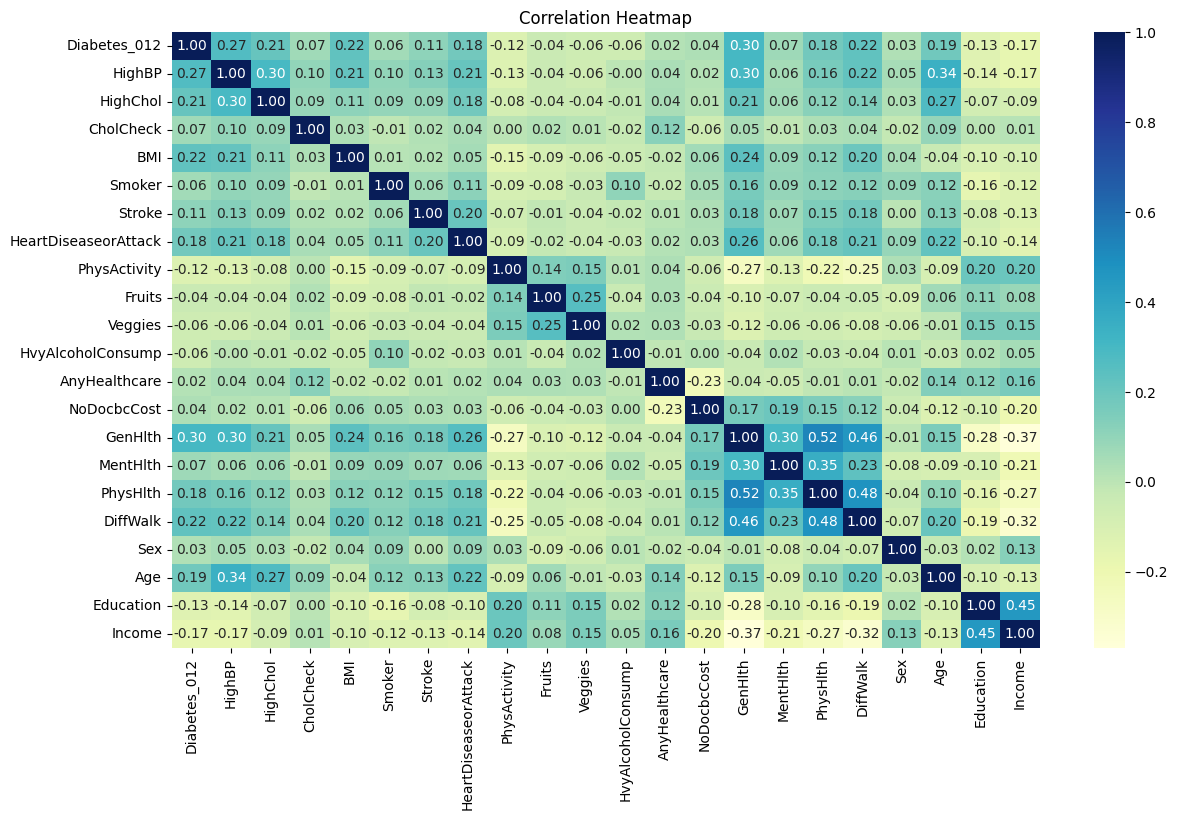

In [ ]:
#Correlation heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(diabetes_df.corr(), annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title("Correlation Heatmap")
plt.show()


*   Features like Age, HighChol (High Cholesterol), and DiffWalk (Difficulty Walking) also show some correlation with diabetes status
*   GenHlth (General Health), HighBP (High Blood Pressure), and BMI would show moderate positive correlations with the target variable (Diabetes_012), indicating their relevance to diabetes status.



**Chi2 Score**

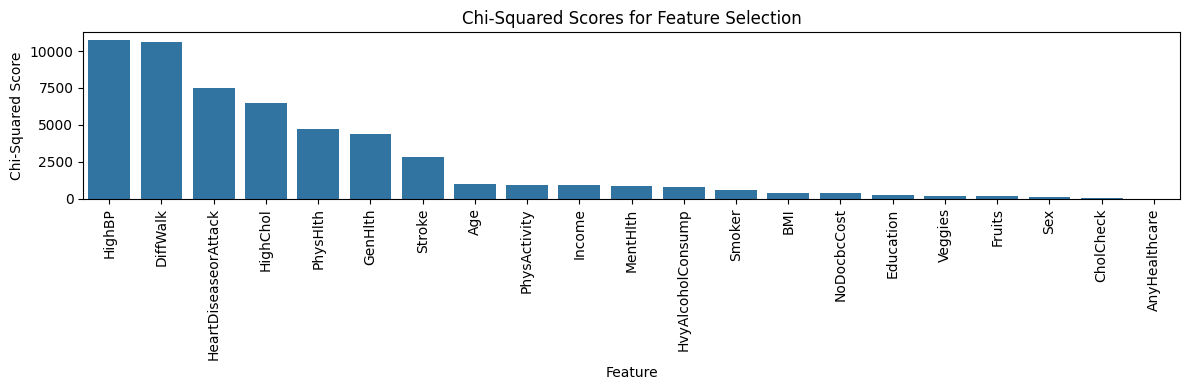


Top Features by Chi-Square Score:
                 Feature  ChiSqr_Score  ChiSqr_pValue
0                 HighBP  10731.721009   0.000000e+00
16              DiffWalk  10627.556856   0.000000e+00
6   HeartDiseaseorAttack   7468.339377   0.000000e+00
1               HighChol   6483.776499   0.000000e+00
15              PhysHlth   4719.959441   0.000000e+00
13               GenHlth   4401.370425   0.000000e+00
5                 Stroke   2798.417025   0.000000e+00
18                   Age    973.268766  4.543313e-212
7           PhysActivity    922.529401  4.734629e-201
20                Income    920.721528  1.169124e-200
14              MentHlth    820.248767  7.677916e-179
10     HvyAlcoholConsump    802.538572  5.382245e-175
4                 Smoker    562.684715  6.524792e-123
3                    BMI    398.378210   3.113658e-87
12           NoDocbcCost    362.740875   1.705374e-79
19             Education    211.763647   1.037787e-46
9                Veggies    168.560797   2.4974

In [ ]:
#Chi2 Score for feature Selection
df_X = diabetes_df.drop('Diabetes_012', axis=1)
df_y = diabetes_df['Diabetes_012']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_X)
f_score, p_value = chi2(X_scaled, df_y)
chisquare_results = pd.DataFrame({'Feature': df_X.columns, 'ChiSqr_Score': f_score, 'ChiSqr_pValue': p_value})
chi2_list = chisquare_results.sort_values(by='ChiSqr_Score', ascending=False)

plt.figure(figsize=(12, 4))
sns.barplot(y='ChiSqr_Score', x='Feature', data=chi2_list)
plt.xticks(rotation=90)
plt.ylabel('Chi-Squared Score')
plt.xlabel('Feature')
plt.title('Chi-Squared Scores for Feature Selection')

plt.tight_layout()
plt.show()


print("\nTop Features by Chi-Square Score:")
print(chi2_list)


**Check For Outlier**

<Figure size 1000x600 with 0 Axes>

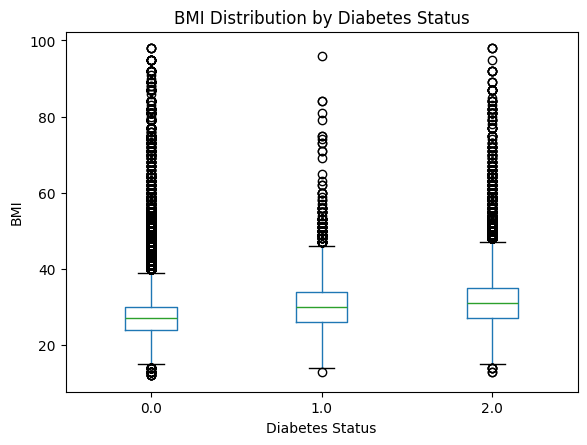

<Figure size 1000x600 with 0 Axes>

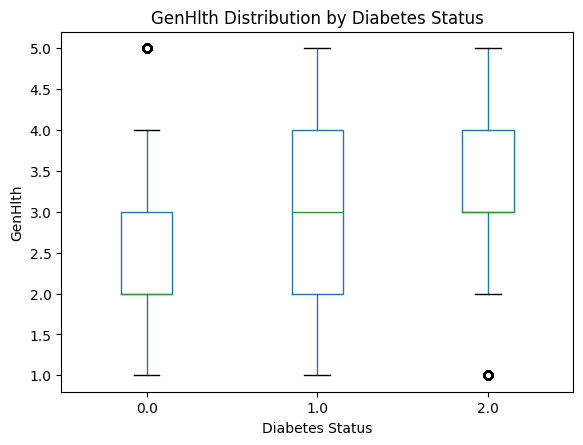

<Figure size 1000x600 with 0 Axes>

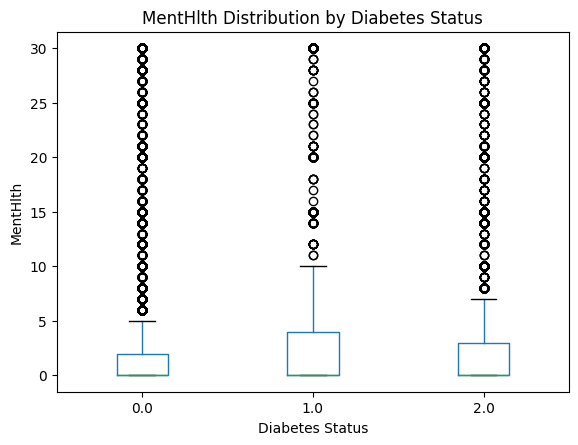

<Figure size 1000x600 with 0 Axes>

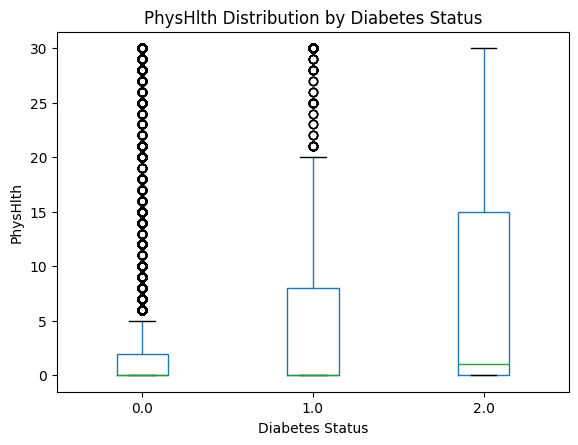

<Figure size 1000x600 with 0 Axes>

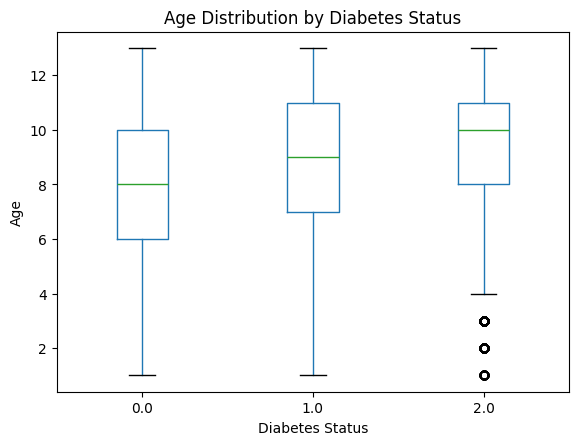

<Figure size 1000x600 with 0 Axes>

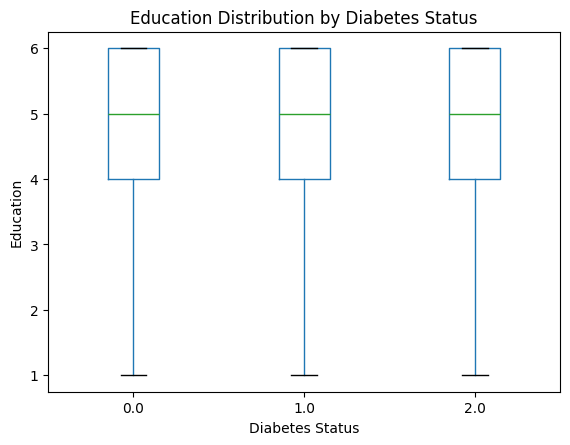

<Figure size 1000x600 with 0 Axes>

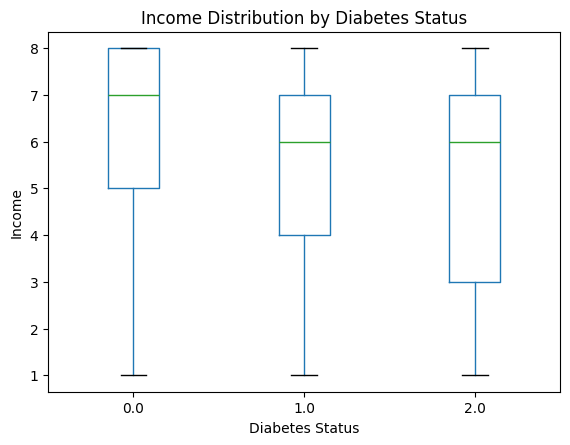

In [ ]:
# Visualizing Continous Variable to see if we have outliers
features = ['BMI', 'GenHlth', 'MentHlth','PhysHlth','Age', 'Education','Income']

for column in features:
    # Boxplot for features vs Diabetes status
    plt.figure(figsize=(10, 6))
    diabetes_df.boxplot(column=column, by='Diabetes_012', grid=False)
    plt.title(column + ' Distribution by Diabetes Status')
    plt.suptitle('')
    plt.xlabel('Diabetes Status')
    plt.ylabel(column)
    plt.show()

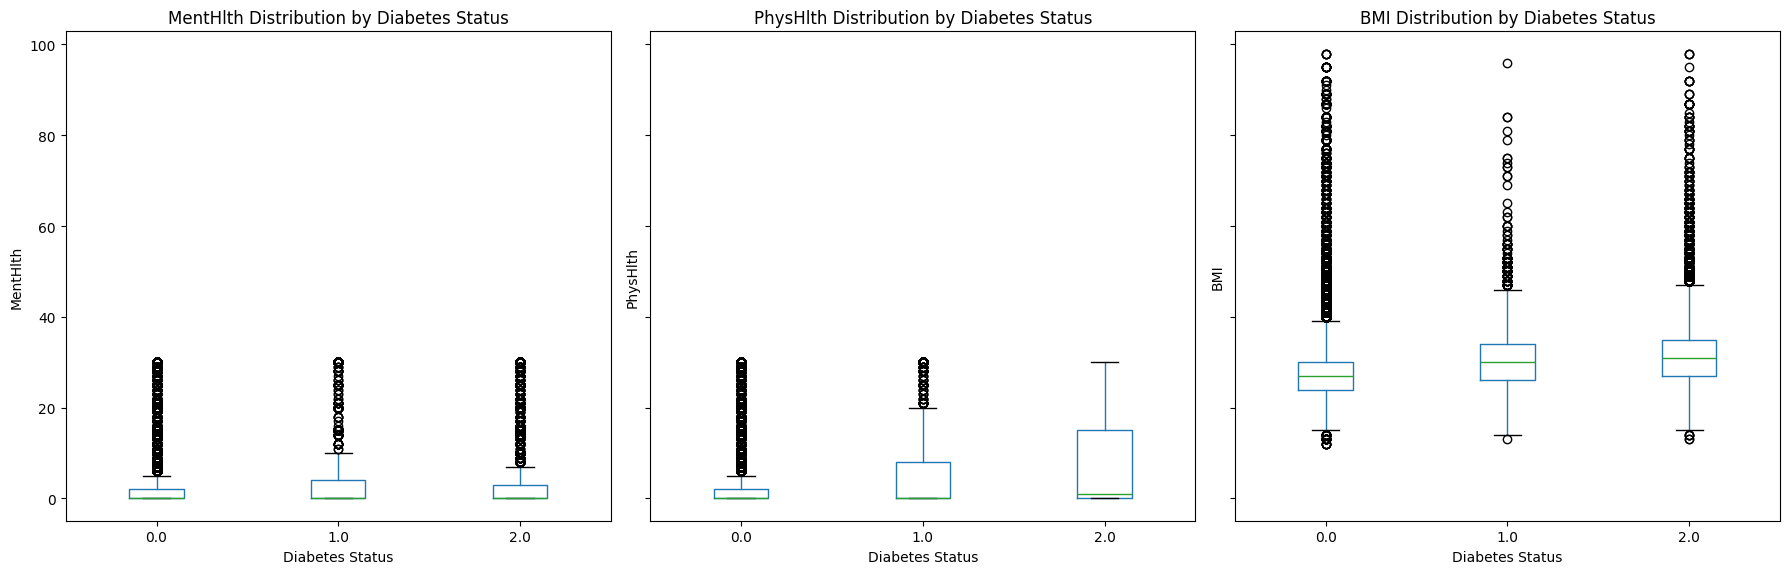

In [ ]:
# features to add in report only for outliers
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Boxplot for MentHlth
diabetes_df.boxplot(column='MentHlth', by='Diabetes_012', grid=False, ax=axes[0])
axes[0].set_title('MentHlth Distribution by Diabetes Status')
axes[0].set_xlabel('Diabetes Status')
axes[0].set_ylabel('MentHlth')

# Boxplot for PhysHlth
diabetes_df.boxplot(column='PhysHlth', by='Diabetes_012', grid=False, ax=axes[1])
axes[1].set_title('PhysHlth Distribution by Diabetes Status')
axes[1].set_xlabel('Diabetes Status')
axes[1].set_ylabel('PhysHlth')

# Boxplot for BMI
diabetes_df.boxplot(column='BMI', by='Diabetes_012', grid=False, ax=axes[2])
axes[2].set_title('BMI Distribution by Diabetes Status')
axes[2].set_xlabel('Diabetes Status')
axes[2].set_ylabel('BMI')

# Adjust the layout and suppress the automatic title
plt.suptitle('')
plt.tight_layout()
plt.show()

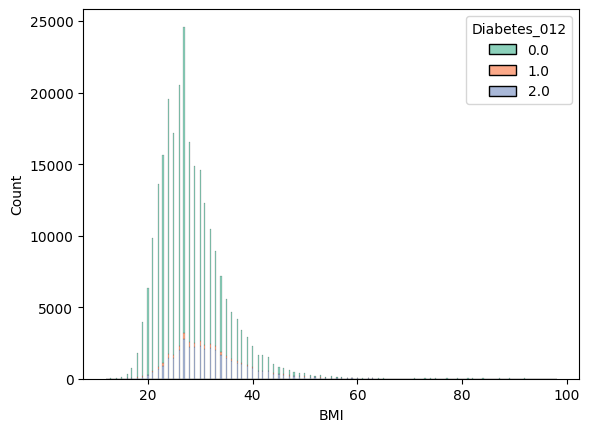

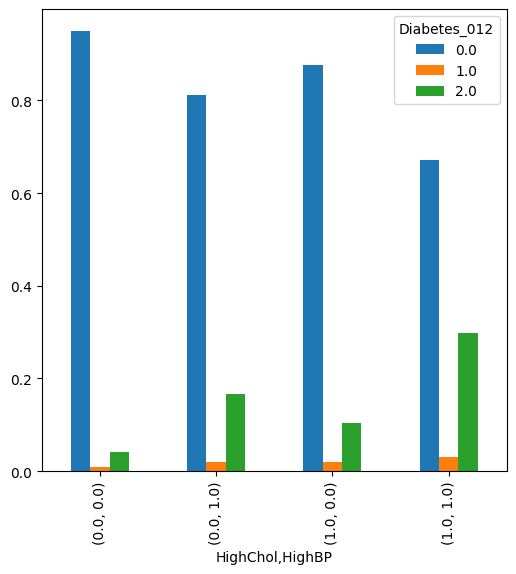

In [ ]:
# distribution of BMI against target Variable
sns.histplot(diabetes_df , x= diabetes_df.BMI,hue=diabetes_df.Diabetes_012 ,multiple='stack', palette="Set2" );

# Combined Histogram of HighCol and HighBP
cross_tab = pd.crosstab([diabetes_df.HighChol, diabetes_df.HighBP], diabetes_df.Diabetes_012, normalize='index')

cross_tab.plot(kind = 'bar' , figsize = (6,6));

# **Model predictions and evaluation Function**

In [ ]:
def Evaluate_Model(model_name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    # Calculate metrics
    # Evaluating the model
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(
        label_binarize(y_test, classes=[0, 1, 2]),
        y_pred_proba,
        average='weighted',
        multi_class='ovr'
    )
    report = classification_report(y_test, y_pred, zero_division=1)
    print(f"{model_name}:")
    print(f"Accuracy: {accuracy}")
    print(f"f1_score: {f1}")
    print(f"roc_auc: {roc_auc}")
    print(f"Classification Report:\n{report}\n")
    return (y_pred, y_pred_proba)


**Remove irrelevant features based on chi2 and correlation matrix**

In [ ]:
columns =["Fruits" , "Veggies"]
diabetes_df = diabetes_df.drop(columns, axis = 1)
diabetes_df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

In [ ]:
# Code to Remove BMI outliers.
# q1 = diabetes_df['BMI'].quantile(0.25)
# q3 = diabetes_df['BMI'].quantile(0.75)
# iqr = q3 - q1
# lower_bound = q1 - (1.5 * iqr)
# upper_bound = q3 + (1.5 * iqr)
# diabetes_df = diabetes_df[diabetes_df['BMI'] < upper_bound]

I also explored removing BMI outliers, but this unexpectedly reduced the model's performance. I believe this occurred because it made the feature less informative, as obesity is a crucial factor in identifying diabetes.

# **Standardization**

**Scaling Train Test - 80 - 20 **

In [ ]:
X = diabetes_df.drop(columns=['Diabetes_012'])
y = diabetes_df['Diabetes_012']

X_std = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, stratify=y, random_state = 42)


# **Handling Class Imbalance**

**Under Sampling using Near Miss**

In [ ]:
nm = NearMiss(version = 1, n_neighbors = 10)
X_nm, y_nm = nm.fit_resample(X,y)
print(y_nm.value_counts())

X_std_nm = StandardScaler().fit_transform(X_nm)

X_train_nm, X_test_nm, y_train_nm, y_test_nm = train_test_split(X_std_nm, y_nm, test_size=0.2, random_state=42, stratify=y_nm)



Diabetes_012
0.0    4631
1.0    4631
2.0    4631
Name: count, dtype: int64


**Resampling with SMOTE**

In [ ]:
# Apply SMOTE to oversample classes 1 and 2
smote = SMOTE(sampling_strategy={1: 2 * y.value_counts()[1], 2: 2 * y.value_counts()[2]}, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print(y_resampled.value_counts())
X_re_std = StandardScaler().fit_transform(X_resampled)
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_re_std, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


Diabetes_012
0.0    213703
2.0     70692
1.0      9262
Name: count, dtype: int64


For SMOTE, I synthetically doubled the minority class rather than matching its size to that of the majority class. This approach was strategically chosen to balance the dataset while mitigating the risks of overfitting and unnecessary duplication of synthetic samples. By limiting oversampling to twice the size of the minority class, the model benefits from a more diverse and representative dataset distribution, reducing the likelihood of overfitting.

**Distribution of Data After Resampling**

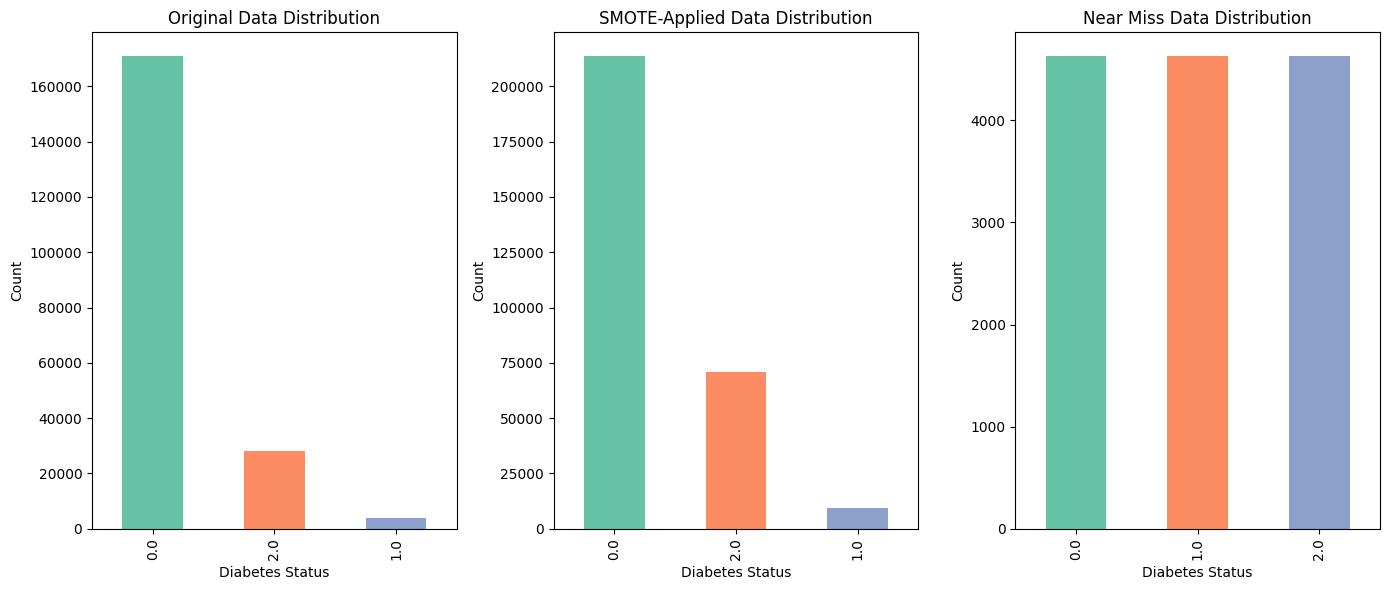

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(14, 6))
colors = plt.get_cmap('Set2').colors

# Original data distribution
y_train.value_counts().plot(kind='bar',color= colors , ax=axes[0])
axes[0].set_title('Original Data Distribution')
axes[0].set_xlabel('Diabetes Status')
axes[0].set_ylabel('Count')

# SMOTE-applied data distribution
y_resampled.value_counts().plot(kind='bar', color=colors, ax=axes[1])
axes[1].set_title('SMOTE-Applied Data Distribution')
axes[1].set_xlabel('Diabetes Status')
axes[1].set_ylabel('Count')

# Near Miss data distribution
y_nm.value_counts().plot(kind='bar', color=colors, ax=axes[2])
axes[2].set_title('Near Miss Data Distribution')
axes[2].set_xlabel('Diabetes Status')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

# **Logistic Regression**

**Baseline Logistic Regression and with class weight**

In [ ]:
# Train Logistic Regression
lr = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
Evaluate_Model("Logistic Regression Baseline", lr, X_train, X_test, y_train, y_test)
lr = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', class_weight="balanced")
Evaluate_Model("Logistic Regression with class weight", lr, X_train, X_test, y_train, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Baseline:
Accuracy: 0.8458096814884895
f1_score: 0.807091979491485
roc_auc: 0.8137806916984933
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42741
         1.0       1.00      0.00      0.00       926
         2.0       0.52      0.17      0.26      7069

    accuracy                           0.85     50736
   macro avg       0.79      0.38      0.39     50736
weighted avg       0.82      0.85      0.81     50736




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression with class weight:
Accuracy: 0.6457150741091139
f1_score: 0.7204292945271058
roc_auc: 0.8127102093821664
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.66      0.78     42741
         1.0       0.03      0.32      0.06       926
         2.0       0.35      0.58      0.44      7069

    accuracy                           0.65     50736
   macro avg       0.45      0.52      0.43     50736
weighted avg       0.85      0.65      0.72     50736




(array([0., 0., 0., ..., 2., 0., 0.]),
 array([[0.47845649, 0.30043658, 0.22110693],
        [0.60301177, 0.25496021, 0.14202802],
        [0.59173329, 0.28453059, 0.12373613],
        ...,
        [0.04203105, 0.27136564, 0.68660331],
        [0.8893461 , 0.08127621, 0.02937769],
        [0.459505  , 0.35591031, 0.18458469]]))

**Logistic Regression with l2 penalty and near miss for handling class imbalance**

In [ ]:
# Train Logistic Regression with Near Miss
lr = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', penalty='l2')
y_pred_nm, y_pred_proba_nm= Evaluate_Model("Logistic Regression with under sampling using Near Miss", lr, X_train_nm, X_test_nm, y_train_nm, y_test_nm)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression with under sampling using Near Miss:
Accuracy: 0.7646635480388629
f1_score: 0.7665155535723355
roc_auc: 0.8923432063855553
Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.85      0.79       926
         1.0       0.93      0.75      0.83       926
         2.0       0.67      0.69      0.68       927

    accuracy                           0.76      2779
   macro avg       0.78      0.76      0.77      2779
weighted avg       0.78      0.76      0.77      2779




**Logistic Regression with l2 penalty and SMOTE for handling class imbalance**

In [ ]:
# Train Logistic Regression with SMOTE
lr = LogisticRegression(max_iter=1000, solver='lbfgs', penalty='l2')
Evaluate_Model("Logistic Regression with Smote", lr, X_train_sm, X_test_sm, y_train_sm, y_test_sm)


Logistic Regression with Smote:
Accuracy: 0.7666859633589865
f1_score: 0.7404287712903354
roc_auc: 0.8164004698740263
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.92      0.86     42741
         1.0       1.00      0.00      0.00      1852
         2.0       0.59      0.42      0.49     14139

    accuracy                           0.77     58732
   macro avg       0.80      0.44      0.45     58732
weighted avg       0.76      0.77      0.74     58732




(array([0., 0., 0., ..., 2., 2., 0.]),
 array([[0.75616748, 0.03089897, 0.21293354],
        [0.97129801, 0.00635532, 0.02234667],
        [0.951528  , 0.01163758, 0.03683442],
        ...,
        [0.22510625, 0.03987295, 0.7350208 ],
        [0.4601469 , 0.05145281, 0.48840029],
        [0.67419537, 0.04885463, 0.27695   ]]))

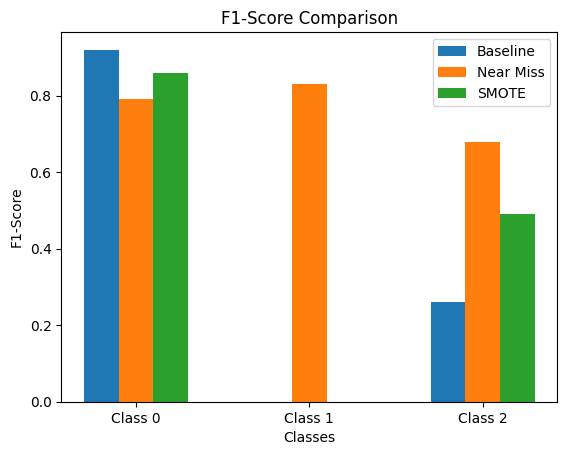

In [ ]:
# took f1 score from above for each class
f1_scores = {
    'Baseline': [0.92, 0.00, 0.26],
    'Near Miss': [0.79, 0.83, 0.68],
    'SMOTE': [0.86, 0.00, 0.49]
}

# Plot F1-scores
classes = ['Class 0', 'Class 1', 'Class 2']
x = np.arange(len(classes))
width = 0.2

plt.bar(x - width, f1_scores['Baseline'], width, label='Baseline')
plt.bar(x, f1_scores['Near Miss'], width, label='Near Miss')
plt.bar(x + width, f1_scores['SMOTE'], width, label='SMOTE')

plt.xlabel('Classes')
plt.ylabel('F1-Score')
plt.title('F1-Score Comparison')
plt.xticks(x, classes)
plt.legend()
plt.show()

# **Random Forest**

**Random Forest with class weight**

In [ ]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
Evaluate_Model("Random Forest Classifier", rf, X_train, X_test, y_train, y_test)


Random Forest Classifier:
Accuracy: 0.8308893093661306
f1_score: 0.7991132106176
roc_auc: 0.7772665054287492
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     42741
         1.0       0.01      0.00      0.01       926
         2.0       0.42      0.18      0.26      7069

    accuracy                           0.83     50736
   macro avg       0.43      0.38      0.39     50736
weighted avg       0.78      0.83      0.80     50736




(array([0., 0., 0., ..., 2., 0., 0.]),
 array([[0.84141925, 0.        , 0.15858075],
        [0.95      , 0.        , 0.05      ],
        [0.95      , 0.01      , 0.04      ],
        ...,
        [0.43      , 0.02      , 0.55      ],
        [0.7       , 0.3       , 0.        ],
        [0.85      , 0.02      , 0.13      ]]))

**Random Foress with near miss to handle class imbalance**

In [ ]:
# Train Random Forest with Near Miss
rf = RandomForestClassifier(n_estimators=100, random_state=42)
Evaluate_Model("Random Forest Classifier", rf, X_train_nm, X_test_nm, y_train_nm, y_test_nm)


Random Forest Classifier:
Accuracy: 0.8002878733357323
f1_score: 0.8001350285917701
roc_auc: 0.9194772755553746
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.89      0.84       926
         1.0       0.88      0.77      0.82       926
         2.0       0.73      0.75      0.74       927

    accuracy                           0.80      2779
   macro avg       0.80      0.80      0.80      2779
weighted avg       0.80      0.80      0.80      2779




(array([0., 0., 2., ..., 0., 1., 0.]),
 array([[1.        , 0.        , 0.        ],
        [0.50470238, 0.2459881 , 0.24930952],
        [0.        , 0.44      , 0.56      ],
        ...,
        [0.99555556, 0.00333333, 0.00111111],
        [0.        , 1.        , 0.        ],
        [0.53945238, 0.26339683, 0.19715079]]))

**Random Foress with SMOTE Resampling to handle class imbalance**

In [ ]:
# Train Random Forest with smote
rf = RandomForestClassifier(n_estimators=100, random_state=42)
Evaluate_Model("Random Forest Classifier", rf, X_train_sm, X_test_sm, y_train_sm, y_test_sm)


Random Forest Classifier:
Accuracy: 0.8465231900837703
f1_score: 0.8304093937633233
roc_auc: 0.8911852676149217
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     42741
         1.0       0.62      0.07      0.13      1852
         2.0       0.76      0.62      0.68     14139

    accuracy                           0.85     58732
   macro avg       0.75      0.55      0.57     58732
weighted avg       0.83      0.85      0.83     58732




(array([0., 0., 0., ..., 2., 0., 2.]),
 array([[0.83      , 0.02      , 0.15      ],
        [1.        , 0.        , 0.        ],
        [0.97947368, 0.        , 0.02052632],
        ...,
        [0.        , 0.02      , 0.98      ],
        [0.70166667, 0.09      , 0.20833333],
        [0.26438889, 0.31205556, 0.42355556]]))

**Feature Importance with Random Forest**

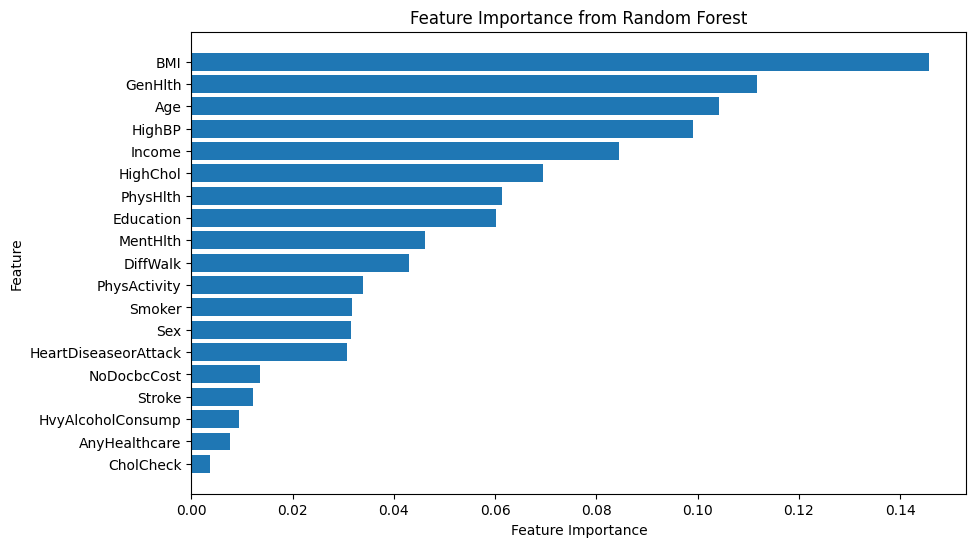

,Feature,Importance
3,BMI,0.145820
11,GenHlth,0.111738
16,Age,0.104220
0,HighBP,0.099125
18,Income,0.084564
1,HighChol,0.069485
13,PhysHlth,0.061272
17,Education,0.060220
12,MentHlth,0.046215
14,DiffWalk,0.042984


In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

feature_importance

**ROC CURVE for Random Forest**

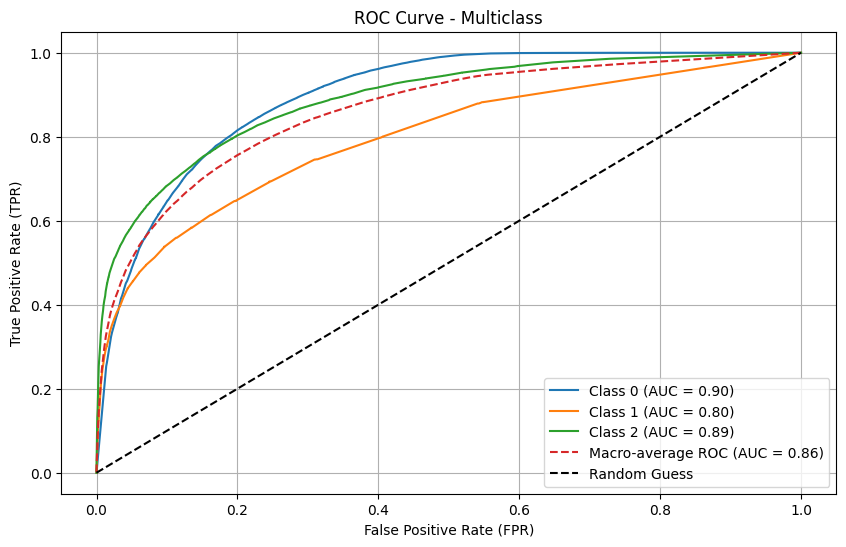

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
classes=[0, 1, 2]
# True labels and predicted probabilities
y_true = label_binarize(y_test_sm, classes=[0, 1, 2])
y_pred_proba = rf.predict_proba(X_test_sm)

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 6))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Macro-average ROC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(classes)
roc_auc_macro = auc(all_fpr, mean_tpr)

plt.plot(all_fpr, mean_tpr, label=f'Macro-average ROC (AUC = {roc_auc_macro:.2f})', linestyle='--')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Multiclass')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [ ]:
# Converting the scaled arrays back to DataFrame
X_train_sm_df = pd.DataFrame(X_train_sm, columns=X.columns)
X_test_sm_df = pd.DataFrame(X_test_sm, columns=X.columns)
importances = rf.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

#Choosing top 13 features for the model
N = 13
top_features = feature_importances.nlargest(N).index

Evaluate_Model("Random Forest Classifier", rf, X_train_sm_df[top_features], X_test_sm_df[top_features], y_train_sm, y_test_sm)


Random Forest Classifier:
Accuracy: 0.8425900701491521
f1_score: 0.8269584140219833
roc_auc: 0.8868303165723685
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     42741
         1.0       0.57      0.07      0.13      1852
         2.0       0.75      0.61      0.67     14139

    accuracy                           0.84     58732
   macro avg       0.73      0.55      0.57     58732
weighted avg       0.83      0.84      0.83     58732




(array([0., 0., 0., ..., 2., 0., 2.]),
 array([[0.79      , 0.02      , 0.19      ],
        [1.        , 0.        , 0.        ],
        [0.96972973, 0.        , 0.03027027],
        ...,
        [0.        , 0.06      , 0.94      ],
        [0.83666667, 0.07      , 0.09333333],
        [0.27161905, 0.23088095, 0.4975    ]]))

# **XGB Classification**

**XGB Model with scale_pos_weight**

In [ ]:
# Calculate scale_pos_weight
class_counts = y.value_counts()
scale_pos_weight = class_counts[0] / class_counts[2]

# Define and train the XGBoost model
xgb_model = XGBClassifier(
    max_depth=6,
    n_estimators=100,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

Evaluate_Model("XGB Classifier", xgb_model, X_train, X_test, y_train, y_test)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:56:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGB Classifier:
Accuracy: 0.8490618101545254
f1_score: 0.8107191753466623
roc_auc: 0.8221753093715267
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42741
         1.0       1.00      0.00      0.00       926
         2.0       0.55      0.18      0.27      7069

    accuracy                           0.85     50736
   macro avg       0.80      0.39      0.40     50736
weighted avg       0.82      0.85      0.81     50736




(array([0, 0, 0, ..., 2, 0, 0]),
 array([[0.8940432 , 0.01332025, 0.09263656],
        [0.9492741 , 0.01117959, 0.03954636],
        [0.9694141 , 0.00933783, 0.02124804],
        ...,
        [0.4035514 , 0.05398616, 0.5424624 ],
        [0.9928911 , 0.00197887, 0.00513002],
        [0.8734914 , 0.01977885, 0.10672978]], dtype=float32))

**XGB with Near Miss Sample**

In [ ]:
xgb_model = XGBClassifier(
    max_depth=6,
    n_estimators=100,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

Evaluate_Model("XGB Classifier with Near Miss resample", xgb_model, X_train_nm, X_test_nm, y_train_nm, y_test_nm)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:57:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGB Classifier with Near Miss resample:
Accuracy: 0.7992083483267363
f1_score: 0.8008746737741796
roc_auc: 0.9262201688600255
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83       926
         1.0       0.94      0.77      0.85       926
         2.0       0.71      0.76      0.73       927

    accuracy                           0.80      2779
   macro avg       0.81      0.80      0.80      2779
weighted avg       0.81      0.80      0.80      2779




(array([0, 0, 1, ..., 0, 1, 0]),
 array([[8.7107605e-01, 2.8559454e-02, 1.0036449e-01],
        [7.6883781e-01, 3.9660446e-02, 1.9150178e-01],
        [2.9927313e-02, 4.9493012e-01, 4.7514257e-01],
        ...,
        [7.9222971e-01, 3.1399786e-02, 1.7637058e-01],
        [7.7863930e-05, 9.9979848e-01, 1.2365752e-04],
        [7.5827920e-01, 4.5187727e-02, 1.9653305e-01]], dtype=float32))

**XGB with SMOTE Sample**

In [ ]:
xgb_model = XGBClassifier(
    max_depth=6,
    n_estimators=100,
    learning_rate=0.1,
    scale_pos_weight = len(y_resampled) / y_resampled.value_counts()[0],
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

Evaluate_Model("XGB Classifier with SMOTE", xgb_model, X_train_sm, X_test_sm, y_train_sm, y_test_sm)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:57:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGB Classifier with SMOTE:
Accuracy: 0.8465061635905469
f1_score: 0.8253299831260288
roc_auc: 0.901983084097925
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     42741
         1.0       0.64      0.02      0.03      1852
         2.0       0.78      0.58      0.67     14139

    accuracy                           0.85     58732
   macro avg       0.76      0.52      0.54     58732
weighted avg       0.83      0.85      0.83     58732




(array([0, 0, 0, ..., 2, 0, 0]),
 array([[0.78426445, 0.02660918, 0.18912633],
        [0.9826592 , 0.00282426, 0.01451649],
        [0.9704678 , 0.00625314, 0.02327903],
        ...,
        [0.0182386 , 0.02266638, 0.95909506],
        [0.6994497 , 0.02962057, 0.27092972],
        [0.56097525, 0.07459734, 0.36442742]], dtype=float32))

# **XGB with Hyperparameter Tuning on SMOTE sample**

In [ ]:
from sklearn.model_selection import GridSearchCV

#Define Model
xgb_model = XGBClassifier(
    scale_pos_weight=len(y_resampled) / y_resampled.value_counts()[0],
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=3,
    n_jobs=-1,
    verbose=1
)

#using SMOTE Sample
grid_search.fit(X_train_sm, y_train_sm)

# Best parameters and evaluation
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


# Test set evaluation
y_pred = best_model.predict(X_test_sm)
y_pred_proba = best_model.predict_proba(X_test_sm)
accuracy = accuracy_score(y_test_sm, y_pred)
f1 = f1_score(y_test_sm, y_pred, average='weighted')
report = classification_report(y_test_sm, y_pred)
roc_auc = roc_auc_score(
        label_binarize(y_test_sm, classes=[0, 1, 2]),
        y_pred_proba,
        average='weighted',
        multi_class='ovr'
    )

print(f"XGB Classifier")
print("Best Parameters:", best_params)
print(f"Accuracy: {accuracy}")
print(f"f1_score: {f1}")
print(f"roc_auc: {roc_auc}")
print(f"Classification Report:\n{report}\n")


Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:07:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGB Classifier
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Accuracy: 0.8534189198392699
f1_score: 0.8344572782131469
roc_auc: 0.9045161942874265
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.92     42741
         1.0       0.75      0.06      0.12      1852
         2.0       0.81      0.59      0.68     14139

    accuracy                           0.85     58732
   macro avg       0.81      0.54      0.57     58732
weighted avg       0.85      0.85      0.83     58732




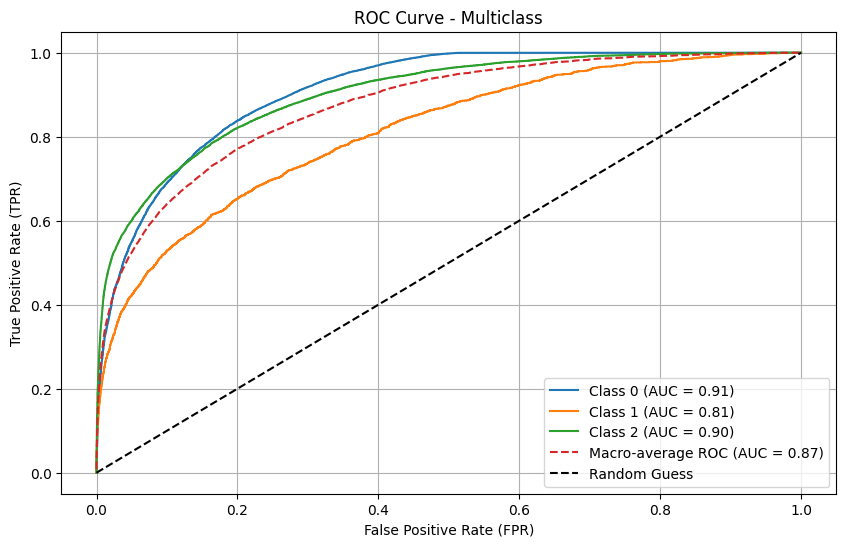

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
classes=[0, 1, 2]
# True labels and predicted probabilities

y_true = label_binarize(y_test_sm, classes=[0, 1, 2])
y_pred_proba = best_model.predict_proba(X_test_sm)

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 6))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Macro-average ROC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(classes)
roc_auc_macro = auc(all_fpr, mean_tpr)

plt.plot(all_fpr, mean_tpr, label=f'Macro-average ROC (AUC = {roc_auc_macro:.2f})', linestyle='--')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Multiclass')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# **WITH Feature Engineering**

**Exploring if Feature Engineering helps model ability to predict class 1 label better**

In [ ]:
#Load Data again
diabetes_df = pd.read_csv("/content/sample_data/diabetes_012_health_indicators_BRFSS2015.csv")
print(diabetes_df.shape)
columns =["Fruits" , "Veggies"]
diabetes_df = diabetes_df.drop(columns, axis = 1)
diabetes_df.columns

(253680, 22)


Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

In [ ]:
diabetes_df['Health_Risk_Score'] = diabetes_df['HighBP'] + diabetes_df['HighChol']
diabetes_df['BMI_Log'] = np.log1p(diabetes_df['BMI'])
diabetes_df.drop(columns=['HighBP', 'HighChol', 'BMI'],inplace=True)
diabetes_df.columns

Index(['Diabetes_012', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
       'PhysActivity', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income', 'Health_Risk_Score', 'BMI_Log'],
      dtype='object')

**Standardization and split**

In [ ]:
X = diabetes_df.drop(columns=['Diabetes_012'])
y = diabetes_df['Diabetes_012']

X_std = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, stratify=y, random_state = 42)


**Near Miss Resampling**

In [ ]:
nm = NearMiss(version = 1, n_neighbors = 10)
X_nm, y_nm = nm.fit_resample(X,y)
print(y_nm.value_counts())

X_std_nm = StandardScaler().fit_transform(X_nm)

X_train_nm, X_test_nm, y_train_nm, y_test_nm = train_test_split(X_std_nm, y_nm, test_size=0.2, random_state=42, stratify=y_nm)


Diabetes_012
0.0    4631
1.0    4631
2.0    4631
Name: count, dtype: int64


**SMOTE resampling**

In [ ]:
# Apply SMOTE to oversample classes 1 and 2
smote = SMOTE(sampling_strategy={1: 2 * y.value_counts()[1], 2: 2 * y.value_counts()[2]}, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print(y_resampled.value_counts())
X_re_std = StandardScaler().fit_transform(X_resampled)
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_re_std, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


Diabetes_012
0.0    213703
2.0     70692
1.0      9262
Name: count, dtype: int64


# **Implement Logistic Regression**

In [ ]:
# Train Logistic Regression
lr = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', class_weight="balanced")
Evaluate_Model("Logistic Regression", lr, X_train, X_test, y_train, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression:
Accuracy: 0.6464246294544308
f1_score: 0.7217938060055772
roc_auc: 0.8142379106668023
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.66      0.78     42741
         1.0       0.03      0.33      0.06       926
         2.0       0.36      0.58      0.44      7069

    accuracy                           0.65     50736
   macro avg       0.45      0.52      0.43     50736
weighted avg       0.85      0.65      0.72     50736




(array([0., 0., 0., ..., 2., 0., 0.]),
 array([[0.48207147, 0.27683498, 0.24109355],
        [0.61000888, 0.25113514, 0.13885598],
        [0.6233364 , 0.26629763, 0.11036597],
        ...,
        [0.04066471, 0.26215103, 0.69718426],
        [0.90268807, 0.07353289, 0.02377904],
        [0.44248066, 0.36051044, 0.1970089 ]]))

In [ ]:
# Train Logistic Regression with Near Miss
lr = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', penalty='l2')
y_pred_nm, y_pred_proba_nm= Evaluate_Model("Logistic Regression with under sampling using Near Miss", lr, X_train_nm, X_test_nm, y_train_nm, y_test_nm)


Logistic Regression with under sampling using Near Miss:
Accuracy: 0.79273119827276
f1_score: 0.7938127949190231
roc_auc: 0.9153718703312166
Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82       926
         1.0       0.95      0.77      0.85       926
         2.0       0.71      0.71      0.71       927

    accuracy                           0.79      2779
   macro avg       0.81      0.79      0.79      2779
weighted avg       0.81      0.79      0.79      2779




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
# Train Logistic Regression with SMOTEE
lr = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', penalty='l2')
Evaluate_Model("Logistic Regression with Smotee", lr, X_train_sm, X_test_sm, y_train_sm, y_test_sm)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression with Smotee:
Accuracy: 0.7679799768439692
f1_score: 0.741818870613925
roc_auc: 0.8185957307176831
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.92      0.86     42741
         1.0       1.00      0.00      0.00      1852
         2.0       0.59      0.42      0.49     14139

    accuracy                           0.77     58732
   macro avg       0.80      0.45      0.45     58732
weighted avg       0.76      0.77      0.74     58732




(array([0., 0., 0., ..., 2., 2., 0.]),
 array([[0.75630822, 0.03546434, 0.20822744],
        [0.97399638, 0.00618947, 0.01981415],
        [0.9534823 , 0.01122256, 0.03529514],
        ...,
        [0.24852132, 0.04309459, 0.70838408],
        [0.46636123, 0.05985105, 0.47378772],
        [0.65793422, 0.05082041, 0.29124537]]))

# **Implement Random Forest**

In [ ]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
Evaluate_Model("Random Forest Classifier", rf, X_train, X_test, y_train, y_test)


Random Forest Classifier:
Accuracy: 0.8296278776411227
f1_score: 0.7995597827894528
roc_auc: 0.774657551991981
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.91     42741
         1.0       0.01      0.00      0.01       926
         2.0       0.42      0.19      0.26      7069

    accuracy                           0.83     50736
   macro avg       0.43      0.38      0.39     50736
weighted avg       0.79      0.83      0.80     50736




(array([0., 0., 0., ..., 0., 0., 0.]),
 array([[0.8724124, 0.       , 0.1275876],
        [0.95     , 0.       , 0.05     ],
        [0.97     , 0.       , 0.03     ],
        ...,
        [0.5      , 0.01     , 0.49     ],
        [0.72     , 0.28     , 0.       ],
        [0.77     , 0.1      , 0.13     ]]))

In [ ]:
# Train Random Forest with Near Miss
rf = RandomForestClassifier(n_estimators=100, random_state=42)
Evaluate_Model("Random Forest Classifier with near miss reshampling", rf, X_train_nm, X_test_nm, y_train_nm, y_test_nm)


Random Forest Classifier with near miss reshampling:
Accuracy: 0.8564231738035264
f1_score: 0.8552901813830662
roc_auc: 0.9392470068610466
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91       926
         1.0       0.91      0.78      0.84       926
         2.0       0.80      0.82      0.81       927

    accuracy                           0.86      2779
   macro avg       0.86      0.86      0.86      2779
weighted avg       0.86      0.86      0.86      2779




(array([0., 0., 2., ..., 0., 1., 0.]),
 array([[0.97988095, 0.        , 0.02011905],
        [1.        , 0.        , 0.        ],
        [0.        , 0.11      , 0.89      ],
        ...,
        [0.96      , 0.01      , 0.03      ],
        [0.        , 1.        , 0.        ],
        [0.84142084, 0.07079669, 0.08778247]]))

In [ ]:
# Train Random Forest with smote
rf = RandomForestClassifier(n_estimators=100, random_state=42)
Evaluate_Model("Random Forest Classifier with SMOTE", rf, X_train_sm, X_test_sm, y_train_sm, y_test_sm)

Random Forest Classifier with SMOTE:
Accuracy: 0.8420111693795546
f1_score: 0.8266353243699898
roc_auc: 0.8909128817563688
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     42741
         1.0       0.64      0.08      0.15      1852
         2.0       0.75      0.62      0.67     14139

    accuracy                           0.84     58732
   macro avg       0.75      0.55      0.58     58732
weighted avg       0.83      0.84      0.83     58732




(array([0., 0., 0., ..., 2., 0., 2.]),
 array([[0.7       , 0.01      , 0.29      ],
        [1.        , 0.        , 0.        ],
        [0.96952381, 0.01      , 0.02047619],
        ...,
        [0.03      , 0.07      , 0.9       ],
        [0.801     , 0.08      , 0.119     ],
        [0.17083333, 0.15666667, 0.6725    ]]))

In [ ]:
# Calculate scale_pos_weight
class_counts = y.value_counts()
scale_pos_weight = class_counts[0] / class_counts[2]
# Define and train the XGBoost model
xgb_model = XGBClassifier(
    max_depth=6,
    n_estimators=100,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

Evaluate_Model("XGB Classifier", xgb_model, X_train, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:00:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGB Classifier:
Accuracy: 0.8491800693787449
f1_score: 0.8108813560477635
roc_auc: 0.8221916017550516
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42741
         1.0       1.00      0.00      0.00       926
         2.0       0.55      0.18      0.28      7069

    accuracy                           0.85     50736
   macro avg       0.81      0.39      0.40     50736
weighted avg       0.82      0.85      0.81     50736




(array([0, 0, 0, ..., 2, 0, 0]),
 array([[0.90503603, 0.01279688, 0.08216709],
        [0.9604342 , 0.00898109, 0.03058473],
        [0.9579082 , 0.01077101, 0.03132075],
        ...,
        [0.41064927, 0.04597998, 0.5433708 ],
        [0.9891537 , 0.00572325, 0.00512311],
        [0.8758661 , 0.02372707, 0.10040677]], dtype=float32))

In [ ]:
xgb_model = XGBClassifier(
    max_depth=6,
    n_estimators=100,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

Evaluate_Model("XGB Classifier", xgb_model, X_train_nm, X_test_nm, y_train_nm, y_test_nm)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:01:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGB Classifier:
Accuracy: 0.8427491903562433
f1_score: 0.8428829843969526
roc_auc: 0.9471300593468372
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88       926
         1.0       0.97      0.79      0.87       926
         2.0       0.77      0.80      0.78       927

    accuracy                           0.84      2779
   macro avg       0.85      0.84      0.84      2779
weighted avg       0.85      0.84      0.84      2779




(array([0, 0, 2, ..., 0, 1, 0]),
 array([[8.11588347e-01, 2.86197066e-02, 1.59791917e-01],
        [9.22533274e-01, 3.31502967e-02, 4.43164594e-02],
        [2.93572037e-03, 2.67894626e-01, 7.29169667e-01],
        ...,
        [5.61336398e-01, 3.87362167e-02, 3.99927408e-01],
        [3.16092555e-05, 9.99877930e-01, 9.03891705e-05],
        [8.73001695e-01, 2.69084815e-02, 1.00089826e-01]], dtype=float32))

In [ ]:
xgb_model = XGBClassifier(
    max_depth=6,
    n_estimators=100,
    learning_rate=0.1,
    scale_pos_weight = len(y_resampled) / y_resampled.value_counts()[0],
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

Evaluate_Model("XGB Classifier", xgb_model, X_train_sm, X_test_sm, y_train_sm, y_test_sm)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:01:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGB Classifier:
Accuracy: 0.8391847715044609
f1_score: 0.8179091304193858
roc_auc: 0.8960919919495648
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     42741
         1.0       0.66      0.02      0.04      1852
         2.0       0.76      0.57      0.65     14139

    accuracy                           0.84     58732
   macro avg       0.76      0.52      0.53     58732
weighted avg       0.83      0.84      0.82     58732




(array([0, 0, 0, ..., 2, 0, 0]),
 array([[0.7951046 , 0.03690814, 0.16798724],
        [0.9786387 , 0.0039652 , 0.01739609],
        [0.961767  , 0.00810361, 0.03012932],
        ...,
        [0.04927026, 0.0445447 , 0.906185  ],
        [0.66978717, 0.03531094, 0.29490194],
        [0.5506837 , 0.06843808, 0.38087824]], dtype=float32))